In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("/content/Mobile-Price-Prediction-cleaned_data.csv")

print(df.head())

   Ratings  RAM    ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  \
0      4.3  4.0  128.0         6.00           48       13.0           4000   
1      3.4  6.0   64.0         4.50           48       12.0           4000   
2      4.3  4.0    4.0         4.50           64       16.0           4000   
3      4.4  6.0   64.0         6.40           48       15.0           3800   
4      4.5  6.0  128.0         6.18           35       15.0           3800   

   Price  
0  24999  
1  15999  
2  15000  
3  18999  
4  18999  


In [55]:
# encoder = LabelEncoder()
# df["brand_encoded"] = encoder.fit_transform(df["brand"])

df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [43]:
inp= df[['RAM', 'ROM', 'Battery_Power', 'Primary_Cam',
        'Selfi_Cam', 'Mobile_Size']]
out= df['Price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()
inp = scaler.fit_transform(X_train)
inp = scaler.transform(X_test)

In [46]:
X_train_scaled = scaler.transform(X_train) # Scale X_train using the already fitted scaler
LR = LinearRegression()
LR.fit(X_train_scaled, y_train)

LinearRegression()

In [47]:
y_pred = LR.predict(scaler.transform(X_test))

In [48]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 292442298.5306006
R2 Score: 0.3075297137300731


In [49]:
new_mobile = [[8, 128, 5000, 48, 16, 6.5]]
new_mobile_scaled = scaler.transform(new_mobile)

predicted_price = LR.predict(new_mobile_scaled)
print("Predicted Price:", predicted_price[0])

Predicted Price: 39221.0367620355


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
test_data = X_test.copy()
test_data["predicted_price"] = y_pred
test_data["actual_price"] = y_test

test_data

,RAM,ROM,Battery_Power,Primary_Cam,Selfi_Cam,Mobile_Size,predicted_price,actual_price
697,6.0,32.0,3800,25,11.0,4.54,25386.600659,1280
296,6.0,64.0,3000,48,8.0,4.50,12360.766304,985
227,6.0,64.0,3000,48,8.0,4.50,12360.766304,639
336,6.0,64.0,5000,48,8.0,6.50,24850.116061,18499
537,6.0,32.0,3000,48,20.0,4.54,9628.118674,3149
...,...,...,...,...,...,...,...,...
668,8.0,64.0,3800,48,8.0,4.54,23042.498307,699
673,4.0,128.0,3500,48,2.0,6.53,17097.581821,16490
753,6.0,64.0,3000,48,22.0,4.50,13745.863964,1199
751,4.0,64.0,3000,64,8.0,4.50,-1515.930098,1099


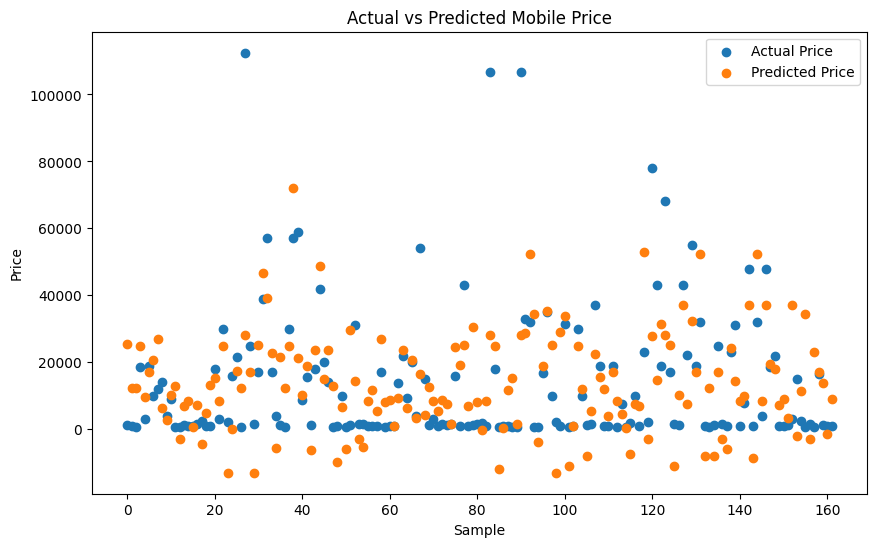

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, label="Actual Price")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted Price")
plt.xlabel("Sample")
plt.ylabel("Price")
plt.title("Actual vs Predicted Mobile Price")
plt.legend()
plt.show()